Imports

In [74]:
from statsmodels.tsa.arima.model import ARIMA
from tensorflow import keras
import numpy as np

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
import warnings
warnings.filterwarnings("ignore")

#### Data Loading

In [141]:
%store -r scaled_distances
%store -r biomass_history_scaled

In [142]:
biomass_history_unscaled = pd.read_csv(r"C:\Users\parul\OneDrive\Desktop\Projects\ShellAI\Shell_AI_Hackathon\dataset\Biomass_History.csv")

In [143]:
biomass_history_unscaled.head()

,Index,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017
0,0,24.66818,71.33144,8.475744,8.868568,9.202181,6.023070,10.788374,6.647325,7.387925,5.180296
1,1,24.66818,71.41106,24.029778,28.551348,25.866415,21.634459,34.419411,27.361908,40.431847,42.126945
2,2,24.66818,71.49069,44.831635,66.111168,56.982258,53.003735,70.917908,42.517117,59.181629,73.203232
3,3,24.66818,71.57031,59.974419,80.821304,78.956543,63.160561,93.513924,70.203171,74.536720,101.067352
4,4,24.66818,71.64994,14.653370,19.327524,21.928144,17.899586,19.534035,19.165791,16.531315,26.086885


In [144]:
biomass_history_scaled = biomass_history_scaled.drop(["Index"], axis = 1)
biomass_history_unscaled = biomass_history_unscaled.drop(["Index"], axis = 1)

In [81]:
biomass_history_scaled = biomass_history_scaled.drop(["Index"], axis = 1)

In [145]:
biomass_history_scaled.head()

,2010,2011,2012,2013,2014,2015,2016,2017,Latitude,Longitude
0,0.009591,0.011501,0.010555,0.004885,0.012375,0.008621,0.014369,0.005862,24.66818,71.33144
1,0.027192,0.037028,0.029670,0.017548,0.039481,0.035486,0.078638,0.047671,24.66818,71.41106
2,0.050732,0.085740,0.065361,0.042992,0.081346,0.055141,0.115106,0.082838,24.66818,71.49069
3,0.067868,0.104818,0.090567,0.051231,0.107265,0.091047,0.144971,0.114369,24.66818,71.57031
4,0.016582,0.025066,0.025152,0.014518,0.022406,0.024856,0.032152,0.029520,24.66818,71.64994


In [146]:
biomass_history_unscaled.head()

,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017
0,24.66818,71.33144,8.475744,8.868568,9.202181,6.023070,10.788374,6.647325,7.387925,5.180296
1,24.66818,71.41106,24.029778,28.551348,25.866415,21.634459,34.419411,27.361908,40.431847,42.126945
2,24.66818,71.49069,44.831635,66.111168,56.982258,53.003735,70.917908,42.517117,59.181629,73.203232
3,24.66818,71.57031,59.974419,80.821304,78.956543,63.160561,93.513924,70.203171,74.536720,101.067352
4,24.66818,71.64994,14.653370,19.327524,21.928144,17.899586,19.534035,19.165791,16.531315,26.086885


In [147]:
location = biomass_history_scaled[["Latitude", "Longitude"]]
time_series_data_scaled = biomass_history_scaled.iloc[:,:7]
y_time_series_data_scaled = biomass_history_scaled[["2017"]]

In [148]:
time_series_data_unscaled = biomass_history_unscaled.iloc[:,2:9]
y_time_series_data_unscaled = biomass_history_unscaled[["2017"]]

#### Data exploration

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


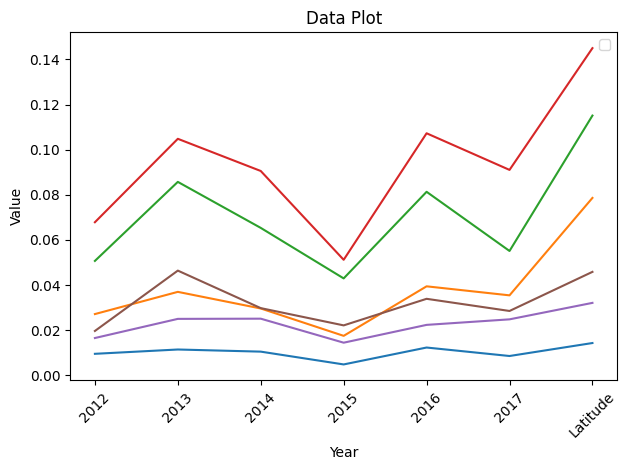

In [236]:
# Extract the years from the column names
years = biomass_history_scaled.columns[2:9]
i = 0
# Loop through each row and plot the values against years
for index, row in biomass_history_scaled.iterrows():
    plt.plot(years, row[:7])
    i += 1
    if i == 6:
        break

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Data Plot of scaled datapoints')
plt.legend()
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


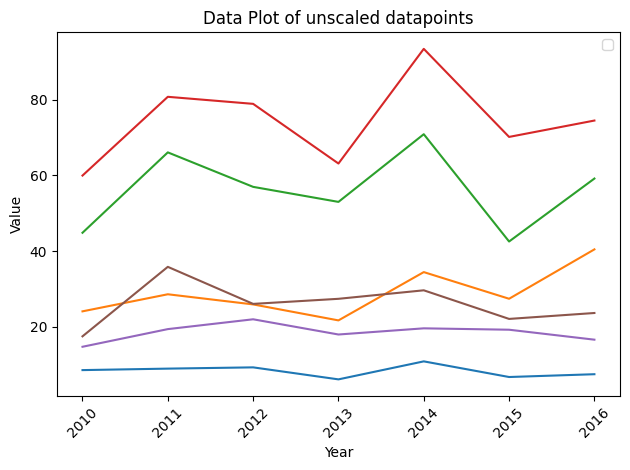

In [238]:
# Extract the years from the column names
years = biomass_history_unscaled.columns[2:9]
i = 0
# Loop through each row and plot the values against years
for index, row in biomass_history_unscaled.iterrows():
    plt.plot(years, row[2:9])
    i += 1
    if i == 6:
        break

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Data Plot of unscaled datapoints')
plt.legend()
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

#### Test for stationary points

In [151]:
test_scaled = time_series_data_scaled.iloc[:5,:]
test_unscaled = time_series_data_unscaled.iloc[:5,:]
y_scaled = y_time_series_data_scaled[:5]
y_unscaled = y_time_series_data_unscaled[:5]

In [126]:
from pmdarima import auto_arima

In [127]:
from statsmodels.tsa.stattools import adfuller

In [152]:
# function to return if the point is stationary or not

def ad_test(dataset):
    dftest = adfuller(dataset, autolag = "AIC")
    #print(dftest)
    
    if dftest[1] < 0.05:
        return True
    else:
        return False

#### Transformations to transform non-stationary point

In [225]:
# function to count number of stationary points, given a dataframe
def number_of_non_stationary_points(dataframe):
    count_of_non_stationary_points = 0

    for row in dataframe.itertuples():
        data = np.sqrt(pd.DataFrame(row)).diff().dropna()
        ad_test_result = ad_test(data)
        if ad_test_result == True:
            pass
        else:
            count_of_non_stationary_points += 1

    return count_of_non_stationary_points

number_of_non_stationary_points(time_series_data_unscaled)

492

In [233]:
# function to count number of stationary points using boxcox transformation, given a dataframe
from scipy import stats
def number_of_non_stationary_points(dataframe):
    count_of_non_stationary_points = 0

    for row in dataframe.itertuples():
        fitted_data, fitted_lambda = stats.boxcox(np.array(row)[1:])
        ad_test_result = ad_test(fitted_data)
        if ad_test_result == True:
            pass
        else:
            count_of_non_stationary_points += 1

    return count_of_non_stationary_points

number_of_non_stationary_points(test_unscaled)

2